# Importing libs


In [1]:
import numpy as np 
import pandas as pd

# Reading the file 

In [43]:
mData = pd.read_csv('bank-additional-full.csv',delimiter=";")
mData.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [52]:
mYData = mData["y"]
mXData = mData.drop(["y","duration"], axis=1)


In [53]:
mXData.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [54]:
col_names= mXData.select_dtypes("object").columns
col_names

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [55]:
mXData[col_names]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
5,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent
7,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent


In [56]:
mXData= pd.get_dummies(mXData, columns=col_names)
mXData.columns


Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [61]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
clf = ExtraTreesClassifier(n_estimators = 100 )
StratifiedKFold =StratifiedKFold(n_splits=10)
scores = cross_validate(clf,  
                        mXData, 
                        mYData, 
                        cv=StratifiedKFold)
print('Average accuracy:',np.mean(scores['test_score']),"(+/-)",2*np.std(scores['test_score']))


Average accuracy: 0.5254121231394191 (+/-) 0.5044449029234997


In [62]:
clf.fit(mXData,mYData)
y_pred = clf.predict(mXData)
print(y_pred)
cnf_matrix = confusion_matrix(mYData, y_pred)
cnf_matrix

['no' 'no' 'no' ... 'no' 'yes' 'no']


array([[36539,     9],
       [  234,  4406]])

[ 0  1  7  8  2 61  4 38 36 22  6  9  5 28 31 56 23 55 58 57 18 39 54 41
  3 60 30 10 21 27 13 43 50 16 14 25 59 42 49 32 33 34 52 26 15 17 11 19
 44 12 48 51 47 53 45 20 40 37 46 24 29 35]
Feature ranking:
1. age (0.155738)
2. campaign (0.104711)
3. euribor3m (0.097535)
4. nr.employed (0.038742)
5. pdays (0.036020)
6. poutcome_success (0.031174)
7. emp.var.rate (0.021790)
8. housing_yes (0.020601)
9. housing_no (0.020544)
10. marital_married (0.017245)
11. cons.conf.idx (0.017220)
12. job_admin. (0.017210)
13. cons.price.idx (0.016772)
14. education_high.school (0.015866)
15. education_university.degree (0.015464)
16. day_of_week_thu (0.014928)
17. marital_single (0.014907)
18. day_of_week_mon (0.014854)
19. day_of_week_wed (0.014454)
20. day_of_week_tue (0.014451)
21. job_technician (0.014283)
22. loan_no (0.014135)
23. day_of_week_fri (0.014015)
24. loan_yes (0.013955)
25. previous (0.012523)
26. poutcome_nonexistent (0.012192)
27. education_professional.course (0.011817)
28. job_bl

(0, 0.16979139702442067)

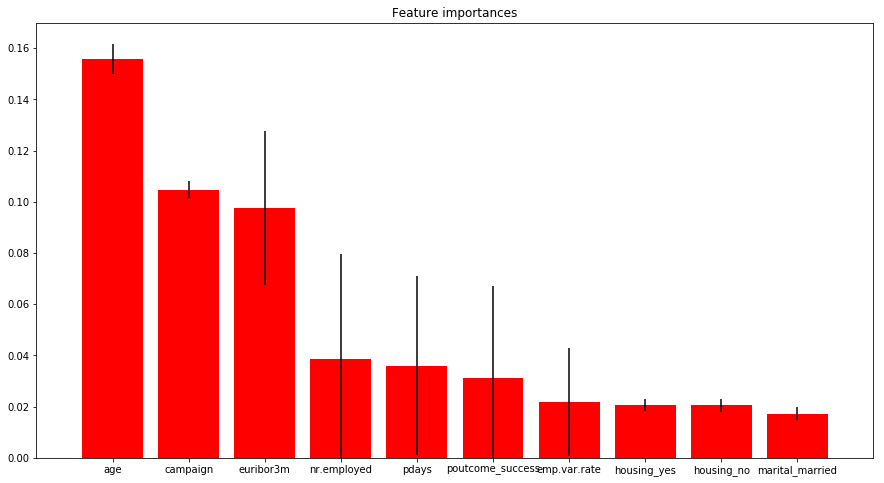

In [67]:
import matplotlib.pyplot as plt
n_features = len(mXData.columns)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, mXData.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="r", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(mXData.columns)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])